In [84]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [85]:
tqdm.pandas()

In [86]:
chembl = pd.read_csv("data/ChEMBL_CYP1A2_activities.csv", sep=";")

In [87]:
chembl

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL4063079,NaN,NaN,314.34,0.0,3.31,10,COc1ccc(O)c(C(=O)/C=C/c2ccc(OC)c(OC)c2)c1,Inhibition,'=',...,CHEMBL3997782,1,Scientific Literature,Eur J Med Chem,2017.0,NaN,NaN,NaN,NaN,60.0
1,CHEMBL4098711,NaN,NaN,374.39,0.0,3.33,13,COc1cc(O)c(C(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)cc1OC,Inhibition,'=',...,CHEMBL3997782,1,Scientific Literature,Eur J Med Chem,2017.0,NaN,NaN,NaN,NaN,-3.1
2,CHEMBL4071093,NaN,NaN,314.34,0.0,3.31,4,COc1cccc(/C=C/C(=O)c2cc(OC)c(OC)cc2O)c1,Inhibition,'=',...,CHEMBL3997782,1,Scientific Literature,Eur J Med Chem,2017.0,NaN,NaN,NaN,NaN,98.0
3,CHEMBL402794,BIS(2-ETHYLHEXYL)PHTHALATE,NaN,390.56,1.0,6.43,BIS(2-ETHYLHEXYL)PHTHALATE,CCCC[C@@H](CC)COC(=O)c1ccccc1C(=O)OC[C@@H](CC)...,IC50,NaN,...,CHEMBL1909046,15,DrugMatrix,NaN,NaN,CHEMBL3833782,NaN,NaN,NaN,NaN
4,CHEMBL150999,NaN,NaN,216.28,0.0,3.26,12,CCCCOc1ccc(-c2ncc[nH]2)cc1,IC50,'=',...,CHEMBL1145921,1,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,25500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26768,CHEMBL4798829,NaN,NaN,415.52,1.0,5.21,37; BAY-179,c1ccc2oc(-c3csc(C4CCN(Cc5nc6ncccc6[nH]5)CC4)n3...,IC50,'>',...,CHEMBL5046307,1,Scientific Literature,ACS Med Chem Lett,2022.0,NaN,NaN,NaN,NaN,20.0
26769,CHEMBL283196,ALPHA-NAPHTHOFLAVONE,NaN,272.30,0.0,4.61,alpha-Naphthoflavone,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,Inhibition,'=',...,CHEMBL5329208,1,Scientific Literature,RSC Med Chem,2023.0,NaN,DOSE = 10.0 microM | TIME = 0.1667 hr,INHIBITOR,NaN,88.7
26770,CHEMBL4802045,BAY-091,NaN,440.48,1.0,5.56,60; BAY-091,CC[C@@H](Nc1c(C#N)c(-c2ccc(-c3cccc(C)c3F)cc2)n...,IC50,'>',...,CHEMBL5241108,1,Scientific Literature,J Med Chem,2021.0,NaN,NaN,NaN,NaN,20.0
26771,CHEMBL288441,BOSUTINIB,4.0,530.46,2.0,5.19,3,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,IC50,NaN,...,CHEMBL5370690,1,Scientific Literature,ACS Med Chem Lett,2023.0,NaN,TIME = 0.08333 hr,NaN,NaN,NaN


In [88]:
chembl.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [89]:
chembl["Data Validity Comment"].value_counts()
# TODO: Ask Hugo what this does

Data Validity Comment
Outside typical range            158
Potential transcription error      1
Name: count, dtype: int64

In [90]:
chembl["Action Type"].value_counts()

Action Type
INHIBITOR    511
SUBSTRATE      8
ACTIVATOR      4
Name: count, dtype: int64

In [91]:
chembl["Standard Units"].value_counts()
# NOTE: there are fewer standard units than 
# for CYP3A4, should I be concerned?

Standard Units
nM              14198
%                2625
uM                244
hr                 12
pmol/min           11
microM/min         11
min-1              10
uL/min              9
nmol/min            9
/min                8
10'-4/min           5
/min/microM         2
pmol/hr             2
ug.mL-1             2
mL.min-1.g-1        2
ug/L                2
mM                  1
Name: count, dtype: int64

In [92]:
chembl["Standard Type"].value_counts()

Standard Type
AC50                          17143
IC50                           5279
Inhibition                     2265
Ki                              928
Activity                        527
INH                             217
Drug metabolism                 121
TDI                              83
EC50                             31
Compound recovery                24
Ratio IC50                       20
Stability                        17
Kinact                           14
FC                               14
Km                               13
T1/2                             12
CL                               11
Inhibitory potential             10
Vmax                              9
IC90                              8
mechanism based inhibition        8
Emax                              3
Kcat/Km                           3
Kcat                              3
NOAEL                             3
Control of P-450 marker           2
IC5                               1
pIC50         

<Axes: xlabel='pChEMBL Value', ylabel='Count'>

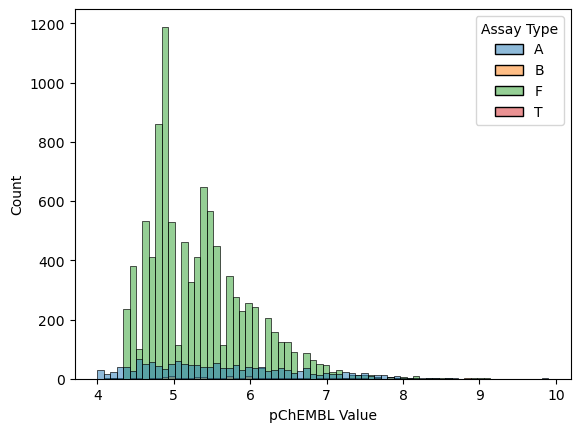

In [ ]:
sns.histplot(data=chembl, x="pChEMBL Value", hue="Assay Type")
# A = ADME
# B = Binding
# F = Functional
# T = Toxicity

<Axes: xlabel='Action Type', ylabel='count'>

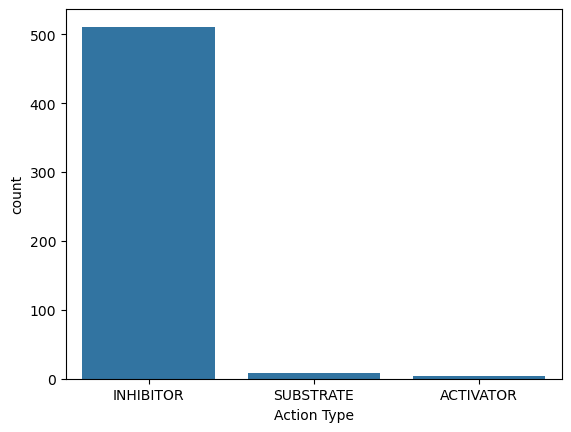

In [94]:
sns.countplot(data=chembl, x="Action Type")

In [95]:
chembl["Molecule ChEMBL ID"].nunique()

23751

In [96]:
chembl["Assay ChEMBL ID"].nunique()

2322

In [97]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid
from utils.utils import standardize_smiles
from utils.utils import smi_to_inchikey

In [98]:
with BlockLogs():
    chembl["CANONICAL_SMILES"] = chembl["Smiles"].progress_apply(lambda x: standardize_smiles(x))

100%|██████████| 26773/26773 [03:35<00:00, 123.96it/s]


In [99]:
# compute inchikeys
with BlockLogs():
    chembl["INCHIKEY"] = chembl["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|██████████| 26773/26773 [00:05<00:00, 4686.92it/s]


In [100]:
chembl["INCHIKEY"].nunique()

23401

In [101]:
chembl.dropna(subset="INCHIKEY", inplace=True)

# select higher quality data

See here for more detail 

https://greglandrum.github.io/rdkit-blog/posts/2023-06-12-overlapping-ic50-assays1.html


## What we will do 

* Select assays with IC50, AC50, pIC50, XC50, EC50, Ki or potency endpoints
* Select assays in nM
* Select assays with more then N molecules (20, 10?)
* Select compounds that appear in more than L of these assays (2, 3 , 5)?

In [102]:
better_assay = chembl[
    (chembl['Standard Type'] == 'IC50') |
    (chembl['Standard Type'] == 'AC50') |
    (chembl['Standard Type'] == 'pIC50') |
    (chembl['Standard Type'] == 'XC50') |
    (chembl['Standard Type'] == 'EC50') | 
    (chembl['Standard Type'] == 'Ki') |
    (chembl['Standard Type'] == 'Potency')
]

In [103]:
better_assay

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY
3,CHEMBL402794,BIS(2-ETHYLHEXYL)PHTHALATE,NaN,390.56,1.0,6.43,BIS(2-ETHYLHEXYL)PHTHALATE,CCCC[C@@H](CC)COC(=O)c1ccccc1C(=O)OC[C@@H](CC)...,IC50,NaN,...,DrugMatrix,NaN,NaN,CHEMBL3833782,NaN,NaN,NaN,NaN,CCCC[C@@H](CC)COC(=O)c1ccccc1C(=O)OC[C@@H](CC)...,BJQHLKABXJIVAM-BGYRXZFFSA-N
4,CHEMBL150999,NaN,NaN,216.28,0.0,3.26,12,CCCCOc1ccc(-c2ncc[nH]2)cc1,IC50,'=',...,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,25500.000000,CCCCOc1ccc(-c2ncc[nH]2)cc1,QBXIGUJIZJQJQP-UHFFFAOYSA-N
5,CHEMBL1443021,NaN,NaN,340.45,0.0,4.49,SID14743529,CCCC(=O)Nc1c(-c2cccs2)c(=O)c2ccccc2n1CC,AC50,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,28.183829,CCCC(=O)Nc1c(-c2cccs2)c(=O)c2ccccc2n1CC,VLUTYDKKZCCBEW-UHFFFAOYSA-N
6,CHEMBL1474281,NaN,NaN,350.42,0.0,3.06,SID4238008,COCCNc1nc(-c2ccc(C(=O)N(C)C)cc2)nc2ccccc12,AC50,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,19.952623,COCCNc1nc(-c2ccc(C(=O)N(C)C)cc2)nc2ccccc12,PPJJKWTYKPVSON-UHFFFAOYSA-N
7,CHEMBL1489737,NaN,NaN,252.30,0.0,3.01,SID7974951,c1ccc(-c2csc3ncn4cnnc4c23)cc1,AC50,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,0.251189,c1ccc(-c2csc3ncn4cnnc4c23)cc1,IHYCWHDELTTWEI-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26766,CHEMBL5441414,NaN,NaN,430.47,0.0,3.21,ASAP-0008418,CC(C)[C@@H](Nc1ncnc2[nH]c(-c3cnn(C)c3C#N)cc12)...,IC50,'=',...,AI-driven Structure-enabled Antiviral Platform...,NaN,2024.0,NaN,NaN,NaN,NaN,8.860000,CC(C)[C@@H](Nc1ncnc2[nH]c(-c3cnn(C)c3C#N)cc12)...,TVKAXNHJIVHZSG-LJQANCHMSA-N
26767,CHEMBL175691,RILPIVIRINE,4.0,366.43,0.0,4.99,RPV; 2,Cc1cc(/C=C/C#N)cc(C)c1Nc1ccnc(Nc2ccc(C#N)cc2)n1,IC50,'=',...,Scientific Literature,J Med Chem,2021.0,NaN,Time_Lower = 15.0 min | Time_Upper = 45.0 min,INHIBITOR,NaN,9.110000,Cc1cc(C=CC#N)cc(C)c1Nc1ccnc(Nc2ccc(C#N)cc2)n1,YIBOMRUWOWDFLG-UHFFFAOYSA-N
26768,CHEMBL4798829,NaN,NaN,415.52,1.0,5.21,37; BAY-179,c1ccc2oc(-c3csc(C4CCN(Cc5nc6ncccc6[nH]5)CC4)n3...,IC50,'>',...,Scientific Literature,ACS Med Chem Lett,2022.0,NaN,NaN,NaN,NaN,20.000000,c1ccc2oc(-c3csc(C4CCN(Cc5nc6cccnc6[nH]5)CC4)n3...,JOCPQSJABURDDD-UHFFFAOYSA-N
26770,CHEMBL4802045,BAY-091,NaN,440.48,1.0,5.56,60; BAY-091,CC[C@@H](Nc1c(C#N)c(-c2ccc(-c3cccc(C)c3F)cc2)n...,IC50,'>',...,Scientific Literature,J Med Chem,2021.0,NaN,NaN,NaN,NaN,20.000000,CCC(Nc1c(C#N)c(-c2ccc(-c3cccc(C)c3F)cc2)nc2cnc...,DVIVLYHDLNAXAT-UHFFFAOYSA-N


In [104]:
better_units = better_assay[better_assay['Standard Units'] == "nM"]
better_units

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY
4,CHEMBL150999,NaN,NaN,216.28,0.0,3.26,12,CCCCOc1ccc(-c2ncc[nH]2)cc1,IC50,'=',...,Scientific Literature,J Med Chem,2003.0,NaN,NaN,NaN,NaN,25500.000000,CCCCOc1ccc(-c2ncc[nH]2)cc1,QBXIGUJIZJQJQP-UHFFFAOYSA-N
5,CHEMBL1443021,NaN,NaN,340.45,0.0,4.49,SID14743529,CCCC(=O)Nc1c(-c2cccs2)c(=O)c2ccccc2n1CC,AC50,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,28.183829,CCCC(=O)Nc1c(-c2cccs2)c(=O)c2ccccc2n1CC,VLUTYDKKZCCBEW-UHFFFAOYSA-N
6,CHEMBL1474281,NaN,NaN,350.42,0.0,3.06,SID4238008,COCCNc1nc(-c2ccc(C(=O)N(C)C)cc2)nc2ccccc12,AC50,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,19.952623,COCCNc1nc(-c2ccc(C(=O)N(C)C)cc2)nc2ccccc12,PPJJKWTYKPVSON-UHFFFAOYSA-N
7,CHEMBL1489737,NaN,NaN,252.30,0.0,3.01,SID7974951,c1ccc(-c2csc3ncn4cnnc4c23)cc1,AC50,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,0.251189,c1ccc(-c2csc3ncn4cnnc4c23)cc1,IHYCWHDELTTWEI-UHFFFAOYSA-N
8,CHEMBL1526421,NaN,NaN,385.45,0.0,3.83,SID17412604,CCOc1ccc(NC(=S)NC(=O)/C=C/c2ccc(C)cc2)c([N+](=...,AC50,'=',...,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,15.848932,CCOc1ccc(NC(=S)NC(=O)/C=C/c2ccc(C)cc2)c([N+](=...,IHOWGNSDOKKWMZ-DHZHZOJOSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26764,CHEMBL4290579,NaN,NaN,442.59,0.0,4.11,13; GNE-131,O=S(=O)(Nc1nnc2cc(OCC34CC5CC(CC(C5)C3)C4)c(C3C...,IC50,'>',...,Scientific Literature,J Med Chem,2018.0,NaN,NaN,NaN,NaN,10.000000,O=S(=O)(Nc1nnc2cc(OCC34CC5CC(CC(C5)C3)C4)c(C3C...,FPERPEQIXLOVIK-UHFFFAOYSA-N
26766,CHEMBL5441414,NaN,NaN,430.47,0.0,3.21,ASAP-0008418,CC(C)[C@@H](Nc1ncnc2[nH]c(-c3cnn(C)c3C#N)cc12)...,IC50,'=',...,AI-driven Structure-enabled Antiviral Platform...,NaN,2024.0,NaN,NaN,NaN,NaN,8.860000,CC(C)[C@@H](Nc1ncnc2[nH]c(-c3cnn(C)c3C#N)cc12)...,TVKAXNHJIVHZSG-LJQANCHMSA-N
26767,CHEMBL175691,RILPIVIRINE,4.0,366.43,0.0,4.99,RPV; 2,Cc1cc(/C=C/C#N)cc(C)c1Nc1ccnc(Nc2ccc(C#N)cc2)n1,IC50,'=',...,Scientific Literature,J Med Chem,2021.0,NaN,Time_Lower = 15.0 min | Time_Upper = 45.0 min,INHIBITOR,NaN,9.110000,Cc1cc(C=CC#N)cc(C)c1Nc1ccnc(Nc2ccc(C#N)cc2)n1,YIBOMRUWOWDFLG-UHFFFAOYSA-N
26768,CHEMBL4798829,NaN,NaN,415.52,1.0,5.21,37; BAY-179,c1ccc2oc(-c3csc(C4CCN(Cc5nc6ncccc6[nH]5)CC4)n3...,IC50,'>',...,Scientific Literature,ACS Med Chem Lett,2022.0,NaN,NaN,NaN,NaN,20.000000,c1ccc2oc(-c3csc(C4CCN(Cc5nc6cccnc6[nH]5)CC4)n3...,JOCPQSJABURDDD-UHFFFAOYSA-N


In [105]:
num_compounds_per_assay = better_units.groupby("Assay ChEMBL ID")["Molecule ChEMBL ID"].nunique()

In [106]:
num_compounds_per_assay_df = pd.DataFrame(num_compounds_per_assay)
num_compounds_per_assay_df.rename(columns={"Molecule ChEMBL ID": "molecule_count"}, inplace=True)
num_compounds_per_assay_df

,molecule_count
Assay ChEMBL ID,
CHEMBL1000510,1
CHEMBL1002233,5
CHEMBL1002900,1
CHEMBL1003694,6
CHEMBL1006248,1
...,...
CHEMBL986383,1
CHEMBL987760,1
CHEMBL989843,18


In [107]:
combined = better_units.join(num_compounds_per_assay_df, on="Assay ChEMBL ID")
combined["molecule_count"].unique()

array([  29, 9625,    5,    2,    4,    6,   31,   40,    1,    9,   14,
         24,   10,   11,    7,    3,   19,   51,   46,   13,   12,   18,
         60,   27,   22,   16,   21,    8,   32,   15,   43,   30,   42,
         85,   20,   17,   47])

In [108]:
N = 10 # assays must have more than N compounds in them 

In [109]:
more_than_N_compounds = combined[combined["molecule_count"] > N]  

In [110]:
more_than_N_compounds

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY,molecule_count
4,CHEMBL150999,NaN,NaN,216.28,0.0,3.26,12,CCCCOc1ccc(-c2ncc[nH]2)cc1,IC50,'=',...,J Med Chem,2003.0,NaN,NaN,NaN,NaN,25500.000000,CCCCOc1ccc(-c2ncc[nH]2)cc1,QBXIGUJIZJQJQP-UHFFFAOYSA-N,29
5,CHEMBL1443021,NaN,NaN,340.45,0.0,4.49,SID14743529,CCCC(=O)Nc1c(-c2cccs2)c(=O)c2ccccc2n1CC,AC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,28.183829,CCCC(=O)Nc1c(-c2cccs2)c(=O)c2ccccc2n1CC,VLUTYDKKZCCBEW-UHFFFAOYSA-N,9625
6,CHEMBL1474281,NaN,NaN,350.42,0.0,3.06,SID4238008,COCCNc1nc(-c2ccc(C(=O)N(C)C)cc2)nc2ccccc12,AC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,19.952623,COCCNc1nc(-c2ccc(C(=O)N(C)C)cc2)nc2ccccc12,PPJJKWTYKPVSON-UHFFFAOYSA-N,9625
7,CHEMBL1489737,NaN,NaN,252.30,0.0,3.01,SID7974951,c1ccc(-c2csc3ncn4cnnc4c23)cc1,AC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,0.251189,c1ccc(-c2csc3ncn4cnnc4c23)cc1,IHYCWHDELTTWEI-UHFFFAOYSA-N,9625
8,CHEMBL1526421,NaN,NaN,385.45,0.0,3.83,SID17412604,CCOc1ccc(NC(=S)NC(=O)/C=C/c2ccc(C)cc2)c([N+](=...,AC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,15.848932,CCOc1ccc(NC(=S)NC(=O)/C=C/c2ccc(C)cc2)c([N+](=...,IHOWGNSDOKKWMZ-DHZHZOJOSA-N,9625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26741,CHEMBL1407471,NaN,NaN,221.33,0.0,1.12,SID4254148,O=C(O)CCN1C(=S)CSC1=S,AC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,5.011872,O=C(O)CCn1c(S)csc1=S,OIPJOAJCTQROCV-UHFFFAOYSA-N,9625
26742,CHEMBL284028,"2,3-DIHYDROXY-6,7-DICHLOROQUINOXALINE",NaN,231.04,0.0,2.35,SID11111034,Oc1nc2cc(Cl)c(Cl)cc2nc1O,AC50,'=',...,NaN,NaN,NaN,NaN,NaN,NaN,5.011872,O=c1[nH]c2cc(Cl)c(Cl)cc2[nH]c1=O,AVBSIKMUAFYZAV-UHFFFAOYSA-N,9625
26748,CHEMBL4564126,TP-008,NaN,411.82,0.0,2.84,18,Cc1cnc(-c2cc(Cl)ccc2F)cc1-n1c(=O)n(CC(N)=O)c2c...,IC50,'=',...,Bioorg Med Chem Lett,2016.0,NaN,NaN,NaN,NaN,4.300000,Cc1cnc(-c2cc(Cl)ccc2F)cc1-n1c(=O)n(CC(N)=O)c2c...,LVEUPFUJRKZPEN-UHFFFAOYSA-N,18
26752,CHEMBL2299352,NaN,NaN,276.13,0.0,3.67,3w,O=C(/C=C/c1ccc(Br)cc1)c1ccc[nH]1,IC50,'=',...,Bioorg Med Chem Lett,2017.0,NaN,NaN,NaN,NaN,13.200000,O=C(/C=C/c1ccc(Br)cc1)c1ccc[nH]1,YDWXSDVWDOHIBJ-VMPITWQZSA-N,24


In [111]:
more_than_N_compounds.INCHIKEY = more_than_N_compounds.INCHIKEY.astype(str)

/var/folders/4h/4_v2nd3n4dn85gnfv734rbbc0000gn/T/ipykernel_16431/3449044069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_N_compounds.INCHIKEY = more_than_N_compounds.INCHIKEY.astype(str)


<Axes: xlabel='pChEMBL Value', ylabel='Count'>

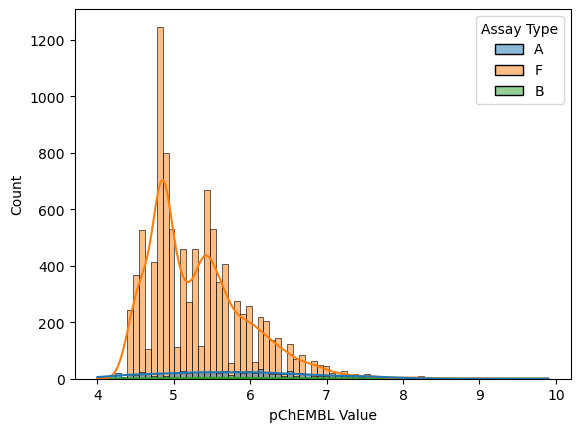

In [112]:
sns.histplot(data=more_than_N_compounds, x="pChEMBL Value", hue="Assay Type", kde=True)

<Axes: xlabel='Molecular Weight', ylabel='Count'>

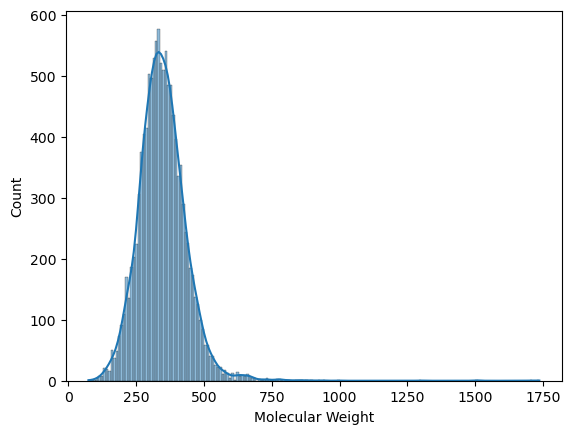

In [113]:
sns.histplot(data=more_than_N_compounds, x="Molecular Weight",  kde=True)

In [114]:
assays = more_than_N_compounds["Assay ChEMBL ID"].nunique()

In [115]:
assays

85

In [116]:
more_than_N_compounds["Molecule ChEMBL ID"].nunique()

11324

In [117]:
num_assays_per_compound_df = more_than_N_compounds.groupby(["INCHIKEY"])["Assay ChEMBL ID"].size().reset_index(name="assay_count")
num_assays_per_compound_df = num_assays_per_compound_df.set_index("INCHIKEY")
num_assays_per_compound_df

,assay_count
INCHIKEY,
AABYLPRACHMDSN-BIWBPYCESA-N,1
AABYLPRACHMDSN-REETXPBOSA-N,1
AACPHNFEDMXRPQ-UHFFFAOYSA-N,1
AACUVVMEFJMWSX-UHFFFAOYSA-N,1
AADCDMQTJNYOSS-LBPRGKRZSA-N,1
...,...
ZZVUWRFHKOJYTH-UHFFFAOYSA-N,3
ZZVXVMRMJNDKKA-UHFFFAOYSA-N,1
ZZWKZQDOSJAGGF-WLNFFEQUSA-N,1


<Axes: xlabel='assay_count', ylabel='count'>

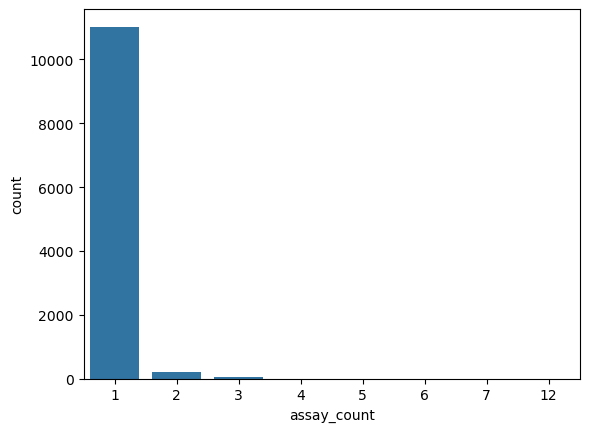

In [118]:
sns.countplot(data=num_assays_per_compound_df, x="assay_count")

In [119]:
combined_2 = more_than_N_compounds.join(num_assays_per_compound_df, on="INCHIKEY")

In [120]:
combined_2.sort_values("assay_count", ascending=False, inplace=True)
combined_2["assay_count"] = combined_2["assay_count"].astype(int)

# Aggregate activity

In [121]:
compound_grouped_mean = combined_2.groupby("INCHIKEY")["pChEMBL Value"].mean()
compound_grouped_mean.reset_index()

,INCHIKEY,pChEMBL Value
0,AABYLPRACHMDSN-BIWBPYCESA-N,4.80
1,AABYLPRACHMDSN-REETXPBOSA-N,4.80
2,AACPHNFEDMXRPQ-UHFFFAOYSA-N,NaN
3,AACUVVMEFJMWSX-UHFFFAOYSA-N,4.65
4,AADCDMQTJNYOSS-LBPRGKRZSA-N,5.40
...,...,...
11287,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,5.00
11288,ZZVXVMRMJNDKKA-UHFFFAOYSA-N,5.85
11289,ZZWKZQDOSJAGGF-WLNFFEQUSA-N,5.40
11290,ZZYJHNUULCMTJL-UHFFFAOYSA-N,6.92


<Axes: xlabel='pChEMBL mean', ylabel='Count'>

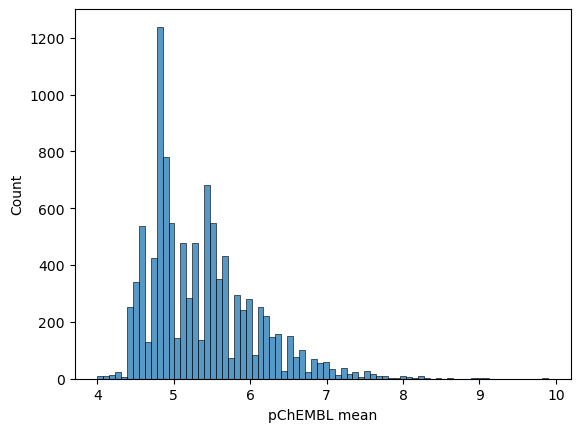

In [122]:
sns.histplot(data=compound_grouped_mean.reset_index(name="pChEMBL mean"),x="pChEMBL mean")

In [123]:
cgm = compound_grouped_mean.reset_index(name="pChEMBL mean")
cgm = cgm.set_index("INCHIKEY")
combined_3 = combined_2.join(cgm, on="INCHIKEY")

In [124]:
compound_grouped_std = combined_2.groupby("INCHIKEY")["pChEMBL Value"].std()
compound_grouped_std.reset_index()

,INCHIKEY,pChEMBL Value
0,AABYLPRACHMDSN-BIWBPYCESA-N,NaN
1,AABYLPRACHMDSN-REETXPBOSA-N,NaN
2,AACPHNFEDMXRPQ-UHFFFAOYSA-N,NaN
3,AACUVVMEFJMWSX-UHFFFAOYSA-N,NaN
4,AADCDMQTJNYOSS-LBPRGKRZSA-N,NaN
...,...,...
11287,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,0.264575
11288,ZZVXVMRMJNDKKA-UHFFFAOYSA-N,NaN
11289,ZZWKZQDOSJAGGF-WLNFFEQUSA-N,NaN
11290,ZZYJHNUULCMTJL-UHFFFAOYSA-N,NaN


<Axes: xlabel='pChEMBL stdev', ylabel='Count'>

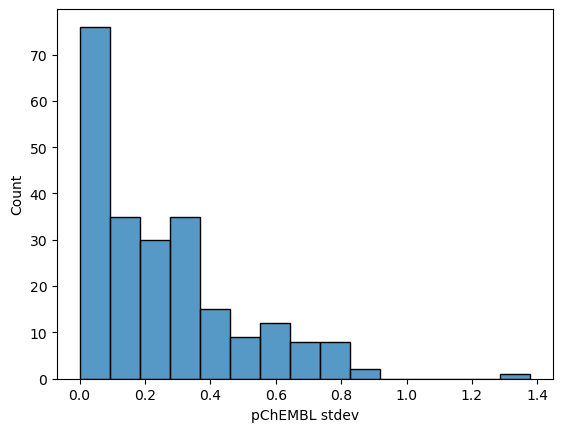

In [125]:
sns.histplot(data=compound_grouped_std.reset_index(name="pChEMBL stdev"),x="pChEMBL stdev")

In [126]:
cgstd = compound_grouped_std.reset_index(name="pChEMBL std")
cgstd = cgstd.set_index("INCHIKEY")
combined_4 =  combined_3.join(cgstd, on="INCHIKEY")

In [127]:
combined_4

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Properties,Action Type,Standard Text Value,Value,CANONICAL_SMILES,INCHIKEY,molecule_count,assay_count,pChEMBL mean,pChEMBL std
22852,CHEMBL283196,ALPHA-NAPHTHOFLAVONE,NaN,272.30,0.0,4.61,alpha-Naphthoflavone,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,IC50,'=',...,NaN,NaN,NaN,0.030000,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,14,12,7.594167,0.58539
25833,CHEMBL283196,ALPHA-NAPHTHOFLAVONE,NaN,272.30,0.0,4.61,Alpha-NF,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,Ki,'=',...,NaN,NaN,NaN,0.020000,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,18,12,7.594167,0.58539
22180,CHEMBL283196,ALPHA-NAPHTHOFLAVONE,NaN,272.30,0.0,4.61,ANF,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,IC50,'=',...,NaN,NaN,NaN,18.000000,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,21,12,7.594167,0.58539
23462,CHEMBL283196,ALPHA-NAPHTHOFLAVONE,NaN,272.30,0.0,4.61,aNF,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,IC50,'=',...,NaN,NaN,NaN,0.019000,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,11,12,7.594167,0.58539
9721,CHEMBL283196,ALPHA-NAPHTHOFLAVONE,NaN,272.30,0.0,4.61,ANF,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,IC50,'=',...,NaN,NaN,NaN,3.800000,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,29,12,7.594167,0.58539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040,CHEMBL1375008,NaN,NaN,229.16,0.0,1.42,SID3717494,Cc1cccc2nc(C(F)(F)F)nc(=O)n12,AC50,'=',...,NaN,NaN,NaN,0.031623,Cc1cccc2nc(C(F)(F)F)nc(=O)n12,KQYVMPPNIQKPGN-UHFFFAOYSA-N,9625,1,7.500000,NaN
8041,CHEMBL251647,(S)-PINACIDIL,NaN,245.33,0.0,2.16,SID11114109,C[C@H](N/C(=N/c1ccncc1)NC#N)C(C)(C)C,AC50,'=',...,NaN,NaN,NaN,15.848932,C[C@H](N=C(N=c1cc[nH]cc1)NC#N)C(C)(C)C,IVVNZDGDKPTYHK-JTQLQIEISA-N,9625,1,4.800000,NaN
8046,CHEMBL1475131,NaN,NaN,247.26,0.0,2.20,SID4238421,N#Cc1cccc(-c2cc(-n3ccnc3)ncn2)c1,AC50,'=',...,NaN,NaN,NaN,0.125893,N#Cc1cccc(-c2cc(-n3ccnc3)ncn2)c1,KEKUABVFRALINE-UHFFFAOYSA-N,9625,1,6.900000,NaN
8051,CHEMBL1438688,NaN,NaN,390.44,0.0,4.53,SID4239484,COc1ccc(CNc2ncnc3ccc(-c4c(C)noc4C)cc23)c(OC)c1,AC50,'=',...,NaN,NaN,NaN,15.848932,COc1ccc(CNc2ncnc3ccc(-c4c(C)noc4C)cc23)c(OC)c1,RAWGGWCJCVUCCV-UHFFFAOYSA-N,9625,1,4.800000,NaN


# Calibration of thresholds for activity and stdev?

## variablitiy

We could subselect for inter-assay variability, but we should probably do a more in depth study into this. 

We would need to select ASSAYs that are outliers and drop them rather than dropping compounds most likely. 

Lets leave it for now. 

## activity

Lets take compounds with pChEMBL >= 5.0 (XC50 = 10 um)


In [128]:
pchembl_thresh = 5.0 
active = combined_4[combined_4["pChEMBL mean"] >= pchembl_thresh]

In [129]:
# now clean up 
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "pChEMBL mean", "pChEMBL std", "Molecule Name", "assay_count", "Action Type"]

In [130]:
clean_active = active[keep_cols]
clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)
clean_active_sorted = clean_active.sort_values("common_name", ascending=False) # keep the ones with names if possible
clean_deduped = clean_active_sorted.drop_duplicates(subset="INCHIKEY", keep="first")
clean_deduped = clean_deduped.sort_values("appears_in_N_ChEMBL_assays", ascending=False)

/var/folders/4h/4_v2nd3n4dn85gnfv734rbbc0000gn/T/ipykernel_16431/2430260740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)


In [131]:
clean_active.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type
22852,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,7.594167,0.58539,ALPHA-NAPHTHOFLAVONE,12,NaN
25833,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,7.594167,0.58539,ALPHA-NAPHTHOFLAVONE,12,NaN
22180,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,7.594167,0.58539,ALPHA-NAPHTHOFLAVONE,12,NaN
23462,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,7.594167,0.58539,ALPHA-NAPHTHOFLAVONE,12,NaN
9721,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,7.594167,0.58539,ALPHA-NAPHTHOFLAVONE,12,NaN


In [132]:
clean_deduped["action_type"].value_counts()

action_type
INHIBITOR    114
Name: count, dtype: int64

In [133]:
clean_deduped["action_type"] = clean_deduped["action_type"].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [134]:
clean_deduped["action_type"].value_counts()

action_type
inhibitor    114
Name: count, dtype: int64

In [135]:
clean_deduped["dataset"] = "ChEMBL_curated"
clean_deduped["active"] = True

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

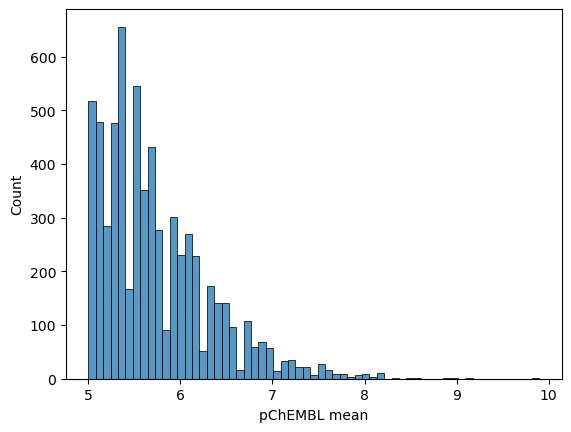

In [136]:
sns.histplot(data=clean_deduped, x="pChEMBL mean")

In [137]:
clean_deduped.to_csv("processed/chembl_active.csv", index=False)

# Subselect by number of assay appearances

In [138]:
#TODO: Ask Hugo how L=3 was selected, we only have 29 compounds that appear in 3 or more assays

L = 1 # compounds must appear in L or more assays
more_than_eq_L_assay = clean_deduped[clean_deduped["appears_in_N_ChEMBL_assays"] >= L]
more_than_eq_L_assay

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
23648,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,7.594167,0.585390,ALPHA-NAPHTHOFLAVONE,12,NaN,ChEMBL_curated,True
23935,CC(C)NC[C@@H](O)COc1cccc2ccccc12,AQHHHDLHHXJYJD-CQSZACIVSA-N,6.385714,0.414039,DEXPROPRANOLOL,7,NaN,ChEMBL_curated,True
26049,Cc1nc2c(=O)n(C)c(=O)n(Cc3ccco3)c2[nH]1,KGQZGCIVHYLPBH-UHFFFAOYSA-N,5.324000,0.673817,FURAFYLLINE,5,NaN,ChEMBL_curated,True
20909,COC(=O)C1=C(C)N=C(C)C(C(=O)OC)C1c1ccccc1[N+](=...,OSUCQKNXQBPLDG-UHFFFAOYSA-N,6.715000,0.817537,NIFEDIPINE,4,NaN,ChEMBL_curated,True
20402,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,5.925000,0.460326,QUERCETIN,4,NaN,ChEMBL_curated,True
...,...,...,...,...,...,...,...,...,...
22034,Cc1noc(NC(=O)Nc2ccccc2F)c1C#N,XKXNHDFGHFCRBG-UHFFFAOYSA-N,6.100000,NaN,NaN,1,NaN,ChEMBL_curated,True
22071,CS(=O)(=O)Nc1ccc(Nc2c3ccccc3nc3ccccc23)cc1,QDTNJAYLSJACEQ-UHFFFAOYSA-N,5.400000,NaN,NaN,1,NaN,ChEMBL_curated,True
22120,Oc1ccc2ccccc2c1/C=C\c1ccc2c(Br)cc(Br)c(O)c2n1,NGEIVDFIXGKIKP-VURMDHGXSA-N,5.400000,NaN,NaN,1,NaN,ChEMBL_curated,True
22118,Cn1ncc2c(NCCc3ccccc3)nc(Cl)nc21,KRNAPVRIULRUAL-UHFFFAOYSA-N,5.600000,NaN,NaN,1,NaN,ChEMBL_curated,True


In [139]:
more_than_eq_L_assay.INCHIKEY.nunique()

6452

<Axes: xlabel='appears_in_N_ChEMBL_assays', ylabel='count'>

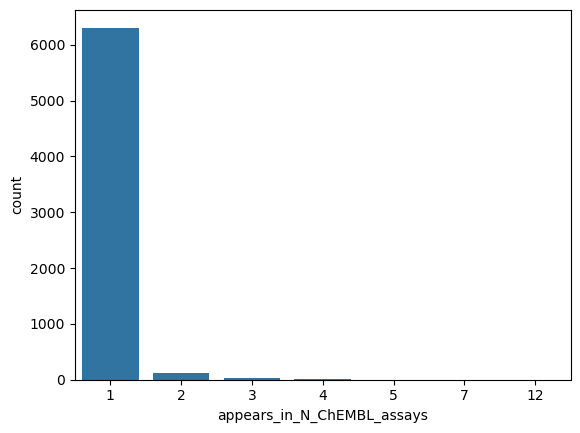

In [140]:
sns.countplot(data=more_than_eq_L_assay, x="appears_in_N_ChEMBL_assays")

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

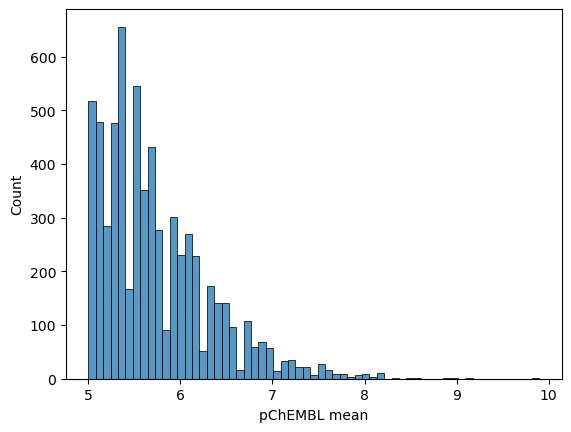

In [141]:
sns.histplot(data=more_than_eq_L_assay, x="pChEMBL mean")

In [142]:
more_than_eq_L_assay

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
23648,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,7.594167,0.585390,ALPHA-NAPHTHOFLAVONE,12,NaN,ChEMBL_curated,True
23935,CC(C)NC[C@@H](O)COc1cccc2ccccc12,AQHHHDLHHXJYJD-CQSZACIVSA-N,6.385714,0.414039,DEXPROPRANOLOL,7,NaN,ChEMBL_curated,True
26049,Cc1nc2c(=O)n(C)c(=O)n(Cc3ccco3)c2[nH]1,KGQZGCIVHYLPBH-UHFFFAOYSA-N,5.324000,0.673817,FURAFYLLINE,5,NaN,ChEMBL_curated,True
20909,COC(=O)C1=C(C)N=C(C)C(C(=O)OC)C1c1ccccc1[N+](=...,OSUCQKNXQBPLDG-UHFFFAOYSA-N,6.715000,0.817537,NIFEDIPINE,4,NaN,ChEMBL_curated,True
20402,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,5.925000,0.460326,QUERCETIN,4,NaN,ChEMBL_curated,True
...,...,...,...,...,...,...,...,...,...
22034,Cc1noc(NC(=O)Nc2ccccc2F)c1C#N,XKXNHDFGHFCRBG-UHFFFAOYSA-N,6.100000,NaN,NaN,1,NaN,ChEMBL_curated,True
22071,CS(=O)(=O)Nc1ccc(Nc2c3ccccc3nc3ccccc23)cc1,QDTNJAYLSJACEQ-UHFFFAOYSA-N,5.400000,NaN,NaN,1,NaN,ChEMBL_curated,True
22120,Oc1ccc2ccccc2c1/C=C\c1ccc2c(Br)cc(Br)c(O)c2n1,NGEIVDFIXGKIKP-VURMDHGXSA-N,5.400000,NaN,NaN,1,NaN,ChEMBL_curated,True
22118,Cn1ncc2c(NCCc3ccccc3)nc(Cl)nc21,KRNAPVRIULRUAL-UHFFFAOYSA-N,5.600000,NaN,NaN,1,NaN,ChEMBL_curated,True


In [143]:
more_than_eq_L_assay["common_name"].value_counts()

common_name
ALPHA-NAPHTHOFLAVONE                 1
BETA-NAPHTHOFLAVONE                  1
ISOXSUPRINE                          1
KAEMPFERIDE                          1
KENPAULLONE                          1
                                    ..
5-(N-METHYL-N-ISOBUTYL)AMILORIDE     1
5-(N-ETHYL-N-ISOPROPYL)AMILORIDE     1
4',7-DIMETHOXY-5-HYDROXYGENISTEIN    1
3-METHYLCHOLANTHRENE                 1
ZOXAZOLAMINE                         1
Name: count, Length: 302, dtype: int64

In [144]:
more_than_eq_L_assay.to_csv("processed/chembl_active_selected.csv", index=False)